In [1]:
!pip install requests pandas matplotlib

In [2]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import timeit
import json

In [3]:
def fetch_weather_forecast(latitude, longitude):
  """Fetch weather forecast data using Open-Meteo API."""
  base_url = "https://api.open-meteo.com/v1/forecast"
  parameters ={
      "latitude": latitude,
      "longitude": longitude,
      "hourly": "temperature",
  }

  # Method 1: Getting response from API using status code
  #Status code 200 means success and response received

  # response = requests.get(base_url, params=parameters)

  # if response.status_code == 200:
  #   return response.json()
  # else:
  #   print("Error fetching data from Open-Meteo API")
  #   return None

  # Method 2 Using Error Handling to perform above operation
  try:
    response = requests.get(base_url, params=parameters)
    response.raise_for_status()  # Check for HTTP request errors
    return response.json()

  except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
  except requests.exceptions.ConnectionError as conn_err:
        print(f"Connection error occurred: {conn_err}")
  except requests.exceptions.Timeout as timeout_err:
        print(f"Timeout error occurred: {timeout_err}")
  except Exception as err:
        print(f"An error occurred: {err}")
  else:
    return None

In [4]:
# Update the analyze_and_visualize_forecast function to accept a city name for the title
def analyze_and_visualize_forecast(data, city_name):
    """Analyze and visualize temperature forecast for a given city."""

    if data:
        # Extracting forecast dates and temperatures
        forecast_dates = data['hourly']['time']
        temperatures = data['hourly']['temperature']

        # Converting date strings to datetime objects
        dates = [datetime.fromisoformat(date) for date in forecast_dates]

        # Visualization: Temperature Forecast Line Chart
        plt.figure(figsize=(10, 5))
        plt.plot(dates[:24], temperatures[:24], marker='o', linestyle='-', label=city_name)
        plt.title(f'24-hour Temperature Forecast for {city_name}')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°C)')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data to analyze and visualize for {city_name}")

In [5]:
def convert_to_dataframe(forecast_data):
    """
    Converts JSON data from the weather API into a pandas DataFrame.

    :param forecast_data: JSON object containing the weather forecast data.
    :return: DataFrame containing the weather forecast.
    """
    try:
        # If the JSON data is nested, you may need to access the specific key where the data list is located
        if 'hourly' in forecast_data:
            # Convert the nested 'hourly' data to a DataFrame
            df = pd.json_normalize(forecast_data['hourly'])
        else:
            # If the JSON data is already in the form of a dictionary at the top level
            df = pd.DataFrame(forecast_data)
        display(df.head())
        return df
    except Exception as e:
        print(f"An error occurred while converting to DataFrame: {e}")
        return None

In [6]:
# Assignment Tasks:

In [7]:
# 1. Implement Data Cleaning Function

# Before analyzing the forecast data, it's crucial to clean and prepare the data.
# Implement the following function to normalize temperature data, handling any anomalies
# or incorrect values.

def clean_temperature_data(data):
    """
    Normalize and clean temperature data.
    - Replace any temperature anomalies (e.g., unusually high or low values) with NaN
    - Fill missing values with the mean temperature of the dataset
    """

    # To Filter temperature anomalies
    # To Set values below -10°C or above 50°C to NaN
    data['temperature'] = data['temperature'].apply(lambda x: np.nan if x < -10 or x > 50 else x)

    # To Fill missing temperature values: Replace NaNs with the mean temperature
    mean_temperature = data['temperature'].mean()
    data['temperature'].fillna(mean_temperature, inplace=True)

    return data


    pass


In [8]:
def create_weather_data(start_date, end_date, size):
    # Setting a seed for reproducibility
    np.random.seed(0)

    # Generating a date range
    dates = pd.date_range(start_date, periods=size, freq='H')

    # Creating realistic temperature data
    temperatures = np.random.normal(loc=20, scale=5, size=size)

    # To Introduce some errors: Set a few temperatures abnormally high or low
    error_indices = np.random.choice(range(size), size=int(0.1 * size), replace=False)
    temperatures[error_indices] = np.random.choice([np.nan, -10, 50], size=len(error_indices))

    # To Create realistic humidity data
    humidity = np.random.uniform(low=30, high=90, size=size)

    # To Introduce missing values
    humidity[np.random.choice(range(size), size=int(0.05 * size), replace=False)] = np.nan

    # To Create a DataFrame
    weather_data = pd.DataFrame({'date': dates,
                                 'temperature': temperatures,
                                 'humidity': humidity})

    # To Verify all arrays are of the same length
    assert len(dates) == len(temperatures) == len(humidity), "All arrays must be of the same length"

    return weather_data

# To Create the data
start_date = datetime.now()
end_date = start_date + timedelta(days=10)
size = (end_date - start_date).days * 24  # Assuming hourly data
weather_data = create_weather_data(start_date, end_date, size)


C:\Users\HP\AppData\Local\Temp\ipykernel_8756\3581729717.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start_date, periods=size, freq='H')


In [9]:
# 2. Enhance Visualization Function

# Extend the existing visualization function to include humidity data in the forecast visualization.
# Assume you modify the fetch_weather_forecast function to include "hourly": ",humidity" in the parameters.

def analyze_and_visualize_forecast_enhanced(data, city_name):
    """
    Enhance the existing visualization to include humidity data.
    - Plot both temperature and humidity on the same graph.
    - Use different colors and markers for each metric.
    """

    if data:
        # Extracting forecast dates, temperatures, and humidities
        forecast_dates = data['hourly']['time']
        temperatures = data['hourly']['temperature']
        humidities = data['hourly']['humidity']

        # Converting date strings to datetime objects
        dates = [datetime.fromisoformat(date) for date in forecast_dates]

        # Visualization: Temperature and Humidity Forecast Line Chart
        plt.figure(figsize=(10, 5))
        plt.plot(dates[:24], temperatures[:24], marker='o', linestyle='-', color='blue', label='Temperature')
        plt.plot(dates[:24], humidities[:24], marker='s', linestyle='-', color='green', label='Humidity')
        plt.title(f'24-hour Forecast for {city_name}')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data to analyze and visualize for {city_name}")

    pass


In [10]:
# 3. Compare Forecasts Function

# Implement a function to compare the temperature forecast between two cities visually.
# Use the data fetched by the fetch_weather_forecast function.

def compare_forecasts(data_city1, data_city2, city_name1, city_name2):
    """
    Compare the 24-hour temperature forecast between two cities.
    - Plot the temperature forecasts of both cities on the same graph.
    - Include a legend to differentiate between cities.
    """
    if data_city1 and data_city2:
        # Extracting forecast dates and temperatures for both cities
        dates_city1 = data_city1['hourly']['time'][:24]
        temperatures_city1 = data_city1['hourly']['temperature'][:24]

        dates_city2 = data_city2['hourly']['time'][:24]
        temperatures_city2 = data_city2['hourly']['temperature'][:24]

        # Converting date strings to datetime objects
        dates_city1 = [datetime.fromisoformat(date) for date in dates_city1]
        dates_city2 = [datetime.fromisoformat(date) for date in dates_city2]

        # Visualization: To Compare temperature forecasts
        plt.figure(figsize=(10, 5))
        plt.plot(dates_city1, temperatures_city1, marker='o', linestyle='-', label=city_name1)
        plt.plot(dates_city2, temperatures_city2, marker='s', linestyle='-', label=city_name2)
        plt.title('Comparison of 24-hour Temperature Forecasts')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°C)')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for comparison.")

    pass


In [11]:
# 4. Aggregate Data Analysis Function

# Analyze the temperature data to find patterns or insights,
# such as the best time of day for outdoor activities based on temperature and humidity.

def find_best_outdoor_activity_time(data):
    """
    Analyze temperature and humidity data to determine the best time of day for outdoor activities.
    - Consider a comfortable temperature range and lower humidity as ideal conditions.
    - Return the time period(s) that best match these conditions.
    """
    if data.empty:
        print("No data available for analysis.")
        return []

    # To Define comfortable temperature range and lower humidity threshold
    comfortable_temp_range = range(18, 26)  # Celsius
    lower_humidity_threshold = 40  # Percent

    # Filtering the data within the comfortable temperature range and lower humidity threshold
    suitable_data = data[(data['temperature'].between(comfortable_temp_range.start, comfortable_temp_range.stop)) &
                         (data['humidity'] < lower_humidity_threshold)]

    if suitable_data.empty:
        print("No suitable time periods found for outdoor activities.")
        return []

    # Identifying time periods with the longest continuous suitable conditions
    best_times = []
    start_time = suitable_data.iloc[0]['date']
    end_time = suitable_data.iloc[0]['date']

    for i in range(1, len(suitable_data)):
        if (suitable_data.iloc[i]['date'] - suitable_data.iloc[i - 1]['date']).seconds / 3600 == 1:
            end_time = suitable_data.iloc[i]['date']
        else:
            best_times.append((start_time, end_time))
            start_time = suitable_data.iloc[i]['date']
            end_time = suitable_data.iloc[i]['date']

    # Appending the last time period
    best_times.append((start_time, end_time))

    return best_times

    pass


In [12]:
# 5. Computation of Weather Metrics

def compute_average_weather_metrics(df_weather):
    """
    Compute the average temperature and humidity from a weather DataFrame.

    Parameters:
    - df_weather: DataFrame containing weather data with 'temperature' and 'humidity' columns.

    Returns:
    - A tuple containing the average temperature and average humidity.
    """
    # To Check if both 'temperature' and 'humidity' columns are present in the DataFrame
    if 'temperature' not in df_weather.columns or 'humidity' not in df_weather.columns:
        print("Required columns ('temperature' and 'humidity') are not present in the DataFrame.")
        return None, None
    # To Check if the DataFrame is empty
    if df_weather.empty:
        print("No data available for computation.")
        return None, None

    # To Convert 'temperature' and 'humidity' columns to numeric, handling non-convertible values
    df_weather['temperature'] = pd.to_numeric(df_weather['temperature'], errors='coerce')
    df_weather['humidity'] = pd.to_numeric(df_weather['humidity'], errors='coerce')

    # To Compute the average temperature and humidity after handling missing or problematic values
    average_temperature = df_weather['temperature'].mean()
    average_humidity = df_weather['humidity'].mean()

    return average_temperature, average_humidity

    pass

Fetching data for Edison, NJ...
Data fetched for Edison, NJ in 21.8424 seconds.
Analyzing and visualizing weather forecast for Edison, NJ...


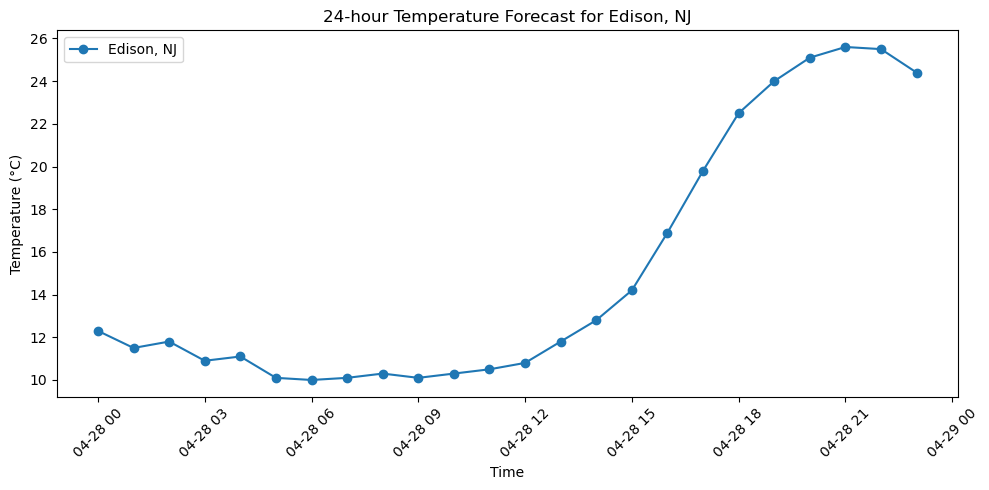

,time,temperature
0,"[2024-04-28T00:00, 2024-04-28T01:00, 2024-04-2...","[12.3, 11.5, 11.8, 10.9, 11.1, 10.1, 10.0, 10...."


Analyzing and visualizing weather forecast for Edison, NJ...


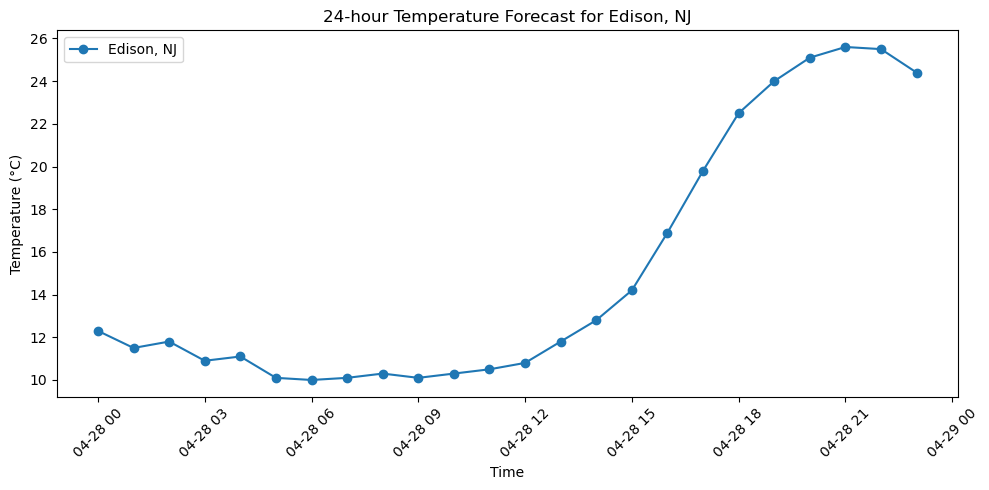

Required columns ('temperature' and 'humidity') are not present in the DataFrame.
Fetching data for Denver, CO...
Data fetched for Denver, CO in 21.7775 seconds.
Analyzing and visualizing weather forecast for Denver, CO...


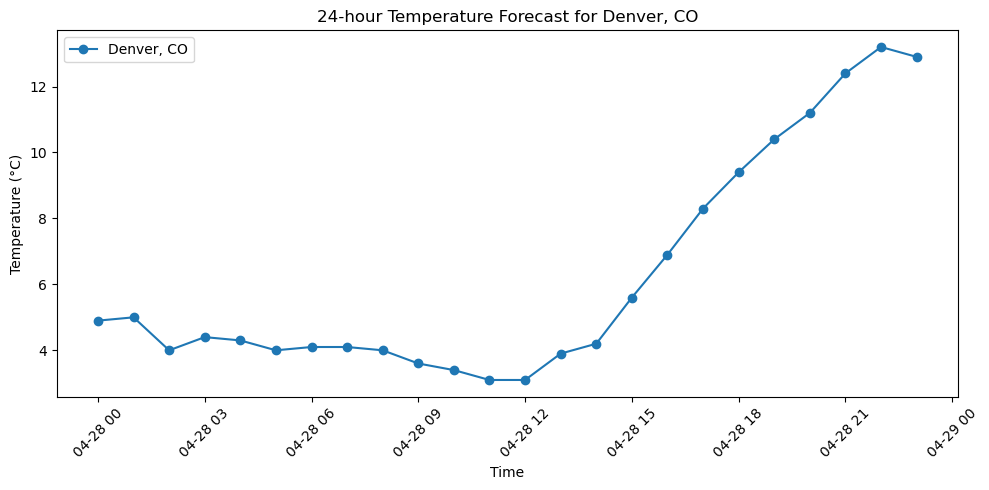

,time,temperature
0,"[2024-04-28T00:00, 2024-04-28T01:00, 2024-04-2...","[4.9, 5.0, 4.0, 4.4, 4.3, 4.0, 4.1, 4.1, 4.0, ..."


Analyzing and visualizing weather forecast for Denver, CO...


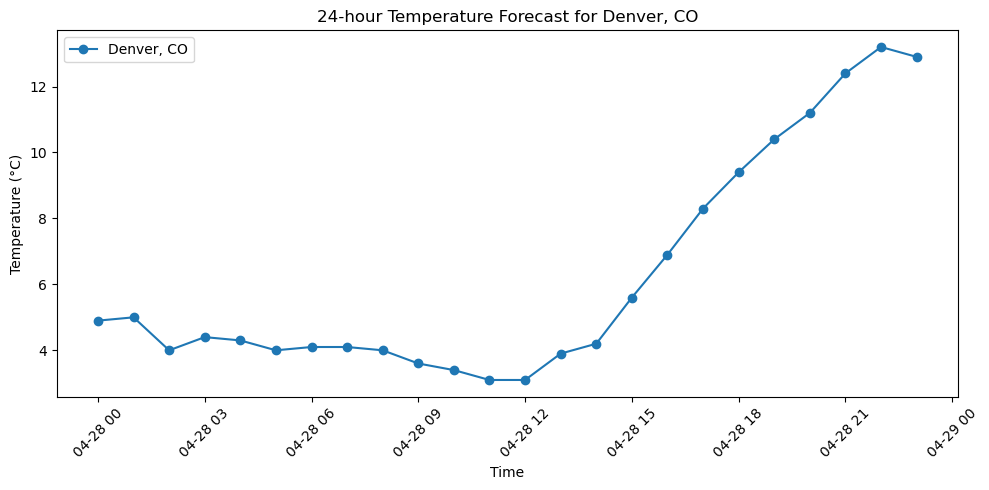

Required columns ('temperature' and 'humidity') are not present in the DataFrame.
Total execution time: 45.8270 seconds.


In [13]:
def main():
    locations = {
        "Edison, NJ": {"latitude": 40.5187, "longitude": -74.4121},
        "Denver, CO": {"latitude": 39.7392, "longitude": -104.9847}    }

    for city, coords in locations.items():
        print(f"Fetching data for {city}...")

        start_time = timeit.default_timer()  # Start timing
        forecast_data = fetch_weather_forecast(coords['latitude'], coords['longitude'])
        elapsed = timeit.default_timer() - start_time  # End timing
        print(f"Data fetched for {city} in {elapsed:.4f} seconds.")

        print(f"Analyzing and visualizing weather forecast for {city}...")
        analyze_and_visualize_forecast(forecast_data, city)

        if forecast_data:
            df = convert_to_dataframe(forecast_data)
            if df is not None:
                print(f"Analyzing and visualizing weather forecast for {city}...")
                analyze_and_visualize_forecast(forecast_data, city)
                compute_average_weather_metrics(df)
            else:
                print(f"Failed to convert forecast data into DataFrame for {city}")
        else:
            print(f"Failed to fetch data for {city}")



if __name__ == "__main__":
    start_time = timeit.default_timer()  # Start timing
    main()
    elapsed = timeit.default_timer() - start_time  # End timing
    print(f"Total execution time: {elapsed:.4f} seconds.")